<font size="5">Section 2: non linear models</font>

# Housekeeping

## import libraries

Pandas for data management, statsmodels, numpy and sklearn for analysis, matplotlib for visualization. Other libraries as needed for specific tasks (e.g. semopy for SEM). Remember to use the bash terminal or the enviroment manager to add libraries.

## read data

Read data files using pandas as noted below. We can clean and organize data in many ways (for example, using the **dropna** command over a dataset).

## describe data

There are many was to analyze data and do descriptive statistics. A good command to start is ***head***, to describe a section of the data.


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
import sklearn
import scipy 
from scipy.stats import nbinom
import seaborn as sns
from statsmodels.iolib.summary2 import summary_col

import warnings
warnings.filterwarnings("ignore")

%matplotlib inline

In [2]:
# higher ed data
demre = pd.read_csv('../data/Adm2024.csv', delimiter=";", decimal=',')
demre.dropna(inplace=True)
VIAC = [1,2,3,4]
TIPO = ["REGULAR", "BEA", "PACE", "+MC"]
demre['TIPO'] = demre['VIA'].replace(VIAC, TIPO)
demre["PRA"] = (demre["PREFERENCIA"]== 1).astype(int)
demre.dtypes

ID_aux             object
CODIGO_UNIV         int64
CODIGO              int64
VIA                 int64
PREFERENCIA         int64
PTJE_POND         float64
TIPO_MATRICULA      int64
TIPO               object
PRA                 int32
dtype: object

In [3]:
demre.reset_index(drop=True, inplace=True)
demre= demre[demre['PTJE_POND'] != 0]
demre.head()

,ID_aux,CODIGO_UNIV,CODIGO,VIA,PREFERENCIA,PTJE_POND,TIPO_MATRICULA,TIPO,PRA
0,id_690126976014,51,51111,1,1,709.90,1,REGULAR,1
1,id_831408370144,18,18075,1,1,713.45,1,REGULAR,1
2,id_752607579265,44,44049,1,1,876.10,1,REGULAR,1
3,id_772307770236,21,21043,1,1,643.30,2,REGULAR,1
4,id_481904877199,41,41067,1,1,638.70,1,REGULAR,1


<Axes: xlabel='PTJE_POND', ylabel='Density'>

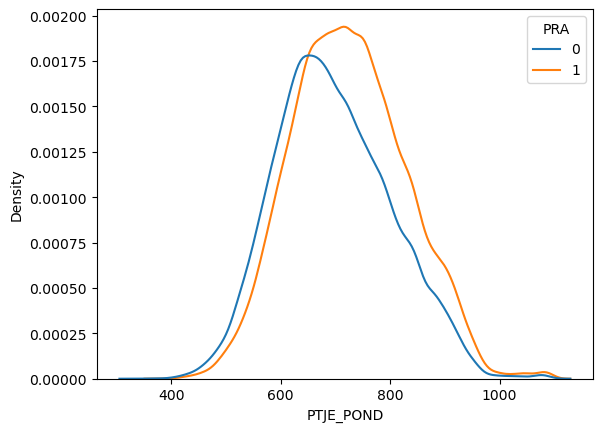

In [4]:
sns.kdeplot(data=demre, x="PTJE_POND", hue="PRA")

### OLS

We can use statsmodels to estimate a simple OLS regression (linear probability model). 

In [5]:
model = smf.ols("PRA ~ PTJE_POND + C(VIA)", data=demre).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                    PRA   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     541.5
Date:                Thu, 24 Apr 2025   Prob (F-statistic):               0.00
Time:                        14:47:28   Log-Likelihood:                -82392.
No. Observations:              115353   AIC:                         1.648e+05
Df Residuals:                  115348   BIC:                         1.648e+05
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.0664      0.010      6.431      

### Probit



In [6]:
probit_model = smf.probit("PRA ~ PTJE_POND*C(TIPO, Treatment(reference='REGULAR'))", data=demre).fit()
print(probit_model.summary())

mfx = probit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.681557
         Iterations 4
                          Probit Regression Results                           
Dep. Variable:                    PRA   No. Observations:               115353
Model:                         Probit   Df Residuals:                   115345
Method:                           MLE   Df Model:                            7
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                 0.01355
Time:                        14:47:29   Log-Likelihood:                -78620.
converged:                       True   LL-Null:                       -79700.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept     

### Logit

In [7]:
logit_model = smf.logit("PRA ~ PTJE_POND*C(TIPO, Treatment(reference='REGULAR'))", data=demre).fit()
print(logit_model.summary())

mfx = logit_model.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.681547
         Iterations 4
                           Logit Regression Results                           
Dep. Variable:                    PRA   No. Observations:               115353
Model:                          Logit   Df Residuals:                   115345
Method:                           MLE   Df Model:                            7
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                 0.01357
Time:                        14:47:30   Log-Likelihood:                -78618.
converged:                       True   LL-Null:                       -79700.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept     

### Poisson

(array([84375., 18629.,  6147.,  2695.,  1394.,   869.,   531.,   341.,
          230.,   142.]),
 array([ 1. ,  2.9,  4.8,  6.7,  8.6, 10.5, 12.4, 14.3, 16.2, 18.1, 20. ]),
 <BarContainer object of 10 artists>)

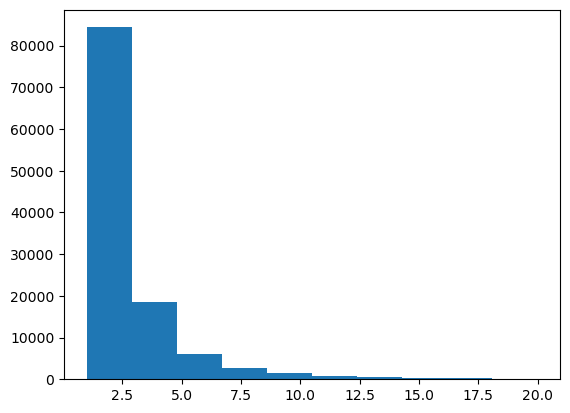

In [8]:
plt.hist(demre.PREFERENCIA)

In [9]:
poisson = smf.poisson("PREFERENCIA ~ PTJE_POND*C(TIPO, Treatment(reference='REGULAR'))", data=demre).fit()
print(poisson.summary())

Optimization terminated successfully.
         Current function value: 2.007541
         Iterations 8
                          Poisson Regression Results                          
Dep. Variable:            PREFERENCIA   No. Observations:               115353
Model:                        Poisson   Df Residuals:                   115345
Method:                           MLE   Df Model:                            7
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                0.008066
Time:                        14:47:31   Log-Likelihood:            -2.3158e+05
converged:                       True   LL-Null:                   -2.3346e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
Intercept     

In [10]:
predictions = poisson.predict(demre)
print(predictions)

0         2.282521
1         2.273032
2         1.878068
3         2.468069
4         2.481428
            ...   
118354    2.065103
118355    2.543190
118356    2.189514
118357    2.359874
118358    2.683776
Length: 115353, dtype: float64


### Negative Binomial

In [11]:
nbin = smf.negativebinomial("PREFERENCIA ~ PTJE_POND*C(TIPO, Treatment(reference='REGULAR'))", data=demre).fit()
print(nbin.summary())

         Current function value: 1.887567
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 48
                     NegativeBinomial Regression Results                      
Dep. Variable:            PREFERENCIA   No. Observations:               115353
Model:               NegativeBinomial   Df Residuals:                   115345
Method:                           MLE   Df Model:                            7
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                0.005100
Time:                        14:47:37   Log-Likelihood:            -2.1774e+05
converged:                      False   LL-Null:                   -2.1885e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------

In [12]:
demre['predictions'] = nbin.predict(demre).astype(float)
print(demre.predictions)

0         2.283147
1         2.273955
2         1.890228
3         2.462640
4         2.475546
            ...   
118354    2.072231
118355    2.535186
118356    2.193003
118357    2.358029
118358    2.670772
Name: predictions, Length: 115353, dtype: float64


In [13]:
demre['sres']=(demre['PREFERENCIA']-demre['predictions'])**2
demre['sres'].sum()/115345

5.340407628269691

### Test overdispersion

A simple test for overdispersion can be determined with the results of the Poisson model, using the ratio of Pearson chi2 / Df Residuals. A value larger than 1 indicates overdispersion.

The Negative Binomial model estimated above is using a value of $\theta$ (or $\alpha=1/\theta$) equal to 1. In order to determine the appropiate value of $\alpha$, you can estimate a simple regression using the output of the Poisson model:

1. Construct the following variable aux=$[(y-\lambda)^2-\lambda]/\lambda$
2. Regress the variable aux with $\lambda$ as the only explanatory variable (no constant)
3. The estimated value is an appropiate guess for $\ln \alpha$

In the model of the previous section, just use the options on sm.families.NegativeBinomial, in order to manually enter the value of alpha. See example below.

In [14]:
aux=((demre['PREFERENCIA']-predictions)**2-predictions)/predictions
auxr=sm.OLS(aux,predictions).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.019
Model:                            OLS   Adj. R-squared (uncentered):              0.019
Method:                 Least Squares   F-statistic:                              2229.
Date:                Thu, 24 Apr 2025   Prob (F-statistic):                        0.00
Time:                        14:47:37   Log-Likelihood:                     -4.2299e+05
No. Observations:              115353   AIC:                                  8.460e+05
Df Residuals:                  115352   BIC:                                  8.460e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

In [15]:
nbin = smf.negativebinomial("PREFERENCIA ~ PTJE_POND*C(TIPO, Treatment(reference='REGULAR'))", data=demre).fit(alpha=1.24)
print(nbin.summary())

         Current function value: 1.887567
         Iterations: 35
         Function evaluations: 48
         Gradient evaluations: 48
                     NegativeBinomial Regression Results                      
Dep. Variable:            PREFERENCIA   No. Observations:               115353
Model:               NegativeBinomial   Df Residuals:                   115345
Method:                           MLE   Df Model:                            7
Date:                Thu, 24 Apr 2025   Pseudo R-squ.:                0.005100
Time:                        14:47:43   Log-Likelihood:            -2.1774e+05
converged:                      False   LL-Null:                   -2.1885e+05
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                                                coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------------------------

<Axes: xlabel='predictions', ylabel='PREFERENCIA'>

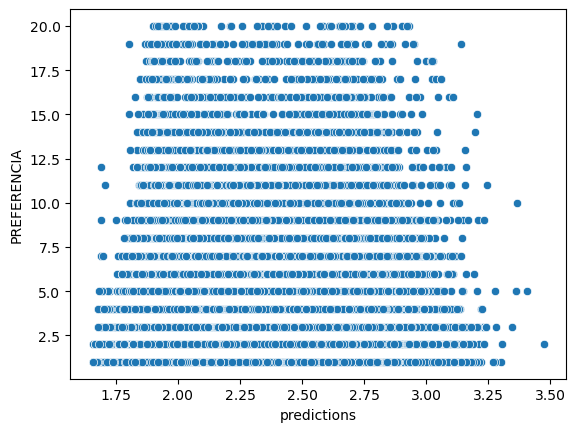

In [16]:
sns.scatterplot(data=demre, y="PREFERENCIA", x="predictions")

<font size="3">**Tarea 1 2025**</font>

<u> *Instrucciones* </u>

Su notebook con las respuestas a la tarea se deben entregar a mas tardar el dia 24/04/25 hasta las 23:59, subiendolo al repositorio en la carpeta tareas/2025. 

Es importante considerar que el código debe poder ejecutarse en cualquier computadora con la data original del repositorio. Recordar la convencion para el nombre de archivo ademas de incluir en su documento titulos y encabezados por seccion. La data a utilizar es **machine_failure_data.csv**.

Las variables tienen la siguiente descripcion:

- Date: data medida en frecuencia diaria
- Location: ubicacion del medidor
- Min_Temp: temperatura minima observada
- Max_Temp: temperatura maxima observada
- Leakage: Filtracion medida en el area
- Evaporation: Tasa de evaporacion
- Electricity: Consumo electrico KW
- Parameter#: Diferentes sensores de reportando direccion y velocidad de viento en distintos momentos del dia, asi como otras metricas relevantes.
- Failure today: El sensor reporta fallo (o no)

<u> Preguntas (todas tienen el mismo puntaje): </u> 

1. Cargar la base de datos en el ambiente. Identifique los tipos de datos que se encuentran en la base, realice estadisticas descriptivas sobre las variables importantes (Hint: Revisar la distribuciones, datos faltantes, outliers, etc.) y limpie las variables cuando sea necesario. 


In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
from scipy.stats import nbinom
import seaborn as sns

import warnings
warnings.filterwarnings("ignore")


In [71]:
def dir(x):
    if x[0] == "N":
        return("N")
    elif x[0] == "S":
        return("S")
    elif x[0] == "E":
        return("E")
    else:
        return("W")

In [72]:
df = pd.read_csv('../data/machine_failure_data.csv', delimiter = ',', decimal = ',')

df['Date'] = pd.to_datetime(df['Date'], format='%m/%d/%Y')
df['año'] = df['Date'].dt.year
df['mes'] = df['Date'].dt.month
df = df[df['año'] >= 2009]
df['fail'] = df['Failure_today'].map({'Yes': 1, 'No': 0})
df['IEl'] = df['Electricity'].isna().astype(int)
df['Electricity']=df['Electricity'].fillna(0).astype(float)
df['IEv'] = df['Evaporation'].isna().astype(int)
df['Evaporation']=df['Evaporation'].fillna(0).astype(float)
df['Max_Temp'] = df['Max_Temp'].astype(float)

df_mask = df[(df["Location"] == 17) | (df["Location"] == 26) | (df["Location"] == 42)| (df["Location"] == 46)| (df["Location"] == 19)] #Eliminamos años con pocos datos
df = df.drop(df_mask.index)
df = df.reset_index(drop=True)
df.dropna(inplace=True)

df["Parameter2_9am"] = df["Parameter2_9am"].apply(dir)
df["Parameter2_3pm"] = df["Parameter2_3pm"].apply(dir)

df.head()

,Date,Location,Min_Temp,Max_Temp,Leakage,Evaporation,Electricity,Parameter1_Dir,Parameter1_Speed,Parameter2_9am,...,Parameter6_9am,Parameter6_3pm,Parameter7_9am,Parameter7_3pm,Failure_today,año,mes,fail,IEl,IEv
21,2009-01-22,3,24.4,34.0,0.6,0.0,0.0,NW,98.0,N,...,4.0,1.0,26.1,33.1,No,2009,1,0.0,1,1
39,2009-02-09,3,18.4,31.2,0.4,0.0,0.0,SE,37.0,S,...,7.0,8.0,18.7,29.4,No,2009,2,0.0,1,1
42,2009-02-12,3,16.1,21.6,0,0.0,0.0,SE,46.0,S,...,2.0,8.0,17,17.3,No,2009,2,0.0,1,1
54,2009-02-24,3,12.9,29.6,0,0.0,0.0,WNW,46.0,S,...,6.0,7.0,18.7,28.6,No,2009,2,0.0,1,1
80,2009-03-22,3,14.6,30.0,0,0.0,0.0,NE,37.0,E,...,3.0,1.0,18.1,29,No,2009,3,0.0,1,1


2. Ejecute un modelo de probabilidad lineal (*MCO*) que permita explicar la probabilidad de que un dia se reporte fallo medido por sensor, a partir de las informacion disponible. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [64]:
formula = "fail ~ Max_Temp + Evaporation + Electricity + Parameter1_Speed + Parameter3_3pm + C(Parameter2_3pm) + C(Location) + C(mes) + IEl + IEv"

ols = smf.ols(formula, data=df).fit()
print(ols.summary())

                            OLS Regression Results                            
Dep. Variable:                   fail   R-squared:                       0.207
Model:                            OLS   Adj. R-squared:                  0.206
Method:                 Least Squares   F-statistic:                     340.2
Date:                Tue, 29 Apr 2025   Prob (F-statistic):               0.00
Time:                        15:49:50   Log-Likelihood:                -29345.
No. Observations:               65255   AIC:                         5.879e+04
Df Residuals:                   65204   BIC:                         5.925e+04
Df Model:                          50                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  0

3. Ejecute un modelo *probit* para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [29]:
probit = smf.probit(formula, data=df).fit()
print(probit.summary())

mfx = probit.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.429141
         Iterations 7
                          Probit Regression Results                           
Dep. Variable:                   fail   No. Observations:                65255
Model:                         Probit   Df Residuals:                    65204
Method:                           MLE   Df Model:                           50
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.2183
Time:                        15:22:21   Log-Likelihood:                -28004.
converged:                       True   LL-Null:                       -35825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  2.0435      0.078     26.077      0.000       1.890      

4. Ejecute un modelo *logit*  para responder a la pregunta 2. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [30]:
logit = smf.logit(formula, data=df).fit()
print(logit.summary())

mfx = logit.get_margeff()
print(mfx.summary())

Optimization terminated successfully.
         Current function value: 0.426365
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                   fail   No. Observations:                65255
Model:                          Logit   Df Residuals:                    65204
Method:                           MLE   Df Model:                           50
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.2234
Time:                        15:24:47   Log-Likelihood:                -27822.
converged:                       True   LL-Null:                       -35825.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                             coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------------
Intercept                  3.8420      0.137     28.089      0.000       3.574      

5. Comente los resultados obtenidos en 2, 3 y 4. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

R: Todo considerado, pueden optar por Probit o Logit (son equivalentes). Al parecer la direccion del viento es mas relevante que la velocidad, la temperatura maxima parece tambien ser relevante, asi como la evaporacion y electricidad (cambios importantes en probabilidad de falla por grado adicional o KW adicional). Asimismo, hay meses que tienen una significativa menor probabilidad de falla, particularmente entre mayo y septiembre.

6. Agregue la data a nivel mensual, usando la data promedio de las variables (ignorando aquellas categoricas, como la direccion del viento). En particular, genere una variable que cuente la cantidad de fallos observados en un mes, utilice un valor de 0 si en ese mes no se reporto fallos en ningun dia. Use un modelo Poisson para explicar el numero de fallas por mes. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

Optimization terminated successfully.
         Current function value: 2.532742
         Iterations 6
                          Poisson Regression Results                          
Dep. Variable:                   fail   No. Observations:                 2796
Model:                        Poisson   Df Residuals:                     2760
Method:                           MLE   Df Model:                           35
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.2294
Time:                        15:55:21   Log-Likelihood:                -7081.5
converged:                       True   LL-Null:                       -9190.2
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.3468      0.100     23.583      0.000       2.152       2.542
C(Locati

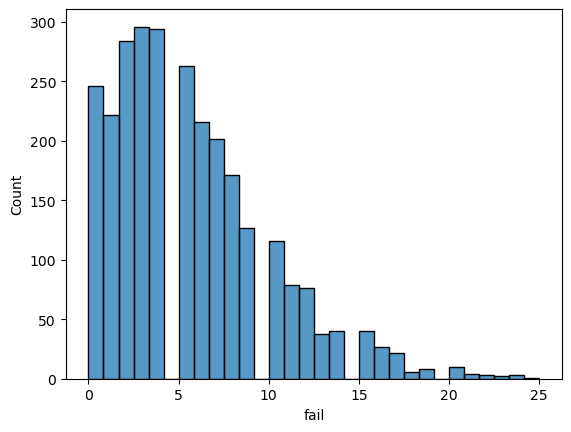

In [76]:
dict = {col: 'mean' for col in dfa if col not in ['año', 'mes','Location', 'fail']}
dict['fail'] = 'sum'

dfa = df.groupby(['año', 'mes','Location'], as_index=False).agg(dict)
dfa['IEl'] = np.where(dfa['Electricity'] == 0, 1, 0)
dfa['IEv'] = np.where(dfa['Evaporation'] == 0, 1, 0)

sns.histplot(data=dfa['fail'])
formula='fail ~ Max_Temp + Evaporation + Electricity + Parameter1_Speed + IEl + IEv + C(Location)'

poisson = smf.poisson(formula, data=dfa).fit()
print(poisson.summary())

7. Determine sobre dispersion en la data y posible valor optimo de alpha para un modelo Binomial Negativa.

In [78]:
yhat = poisson.predict(dfa)
aux=((dfa['fail']-yhat)**2-yhat)/yhat
auxr=sm.OLS(aux,yhat).fit()
print(auxr.summary())

                                 OLS Regression Results                                
Dep. Variable:                      y   R-squared (uncentered):                   0.051
Model:                            OLS   Adj. R-squared (uncentered):              0.051
Method:                 Least Squares   F-statistic:                              150.3
Date:                Tue, 29 Apr 2025   Prob (F-statistic):                    1.07e-33
Time:                        15:57:00   Log-Likelihood:                         -6773.8
No. Observations:                2796   AIC:                                  1.355e+04
Df Residuals:                    2795   BIC:                                  1.356e+04
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

8. Usando la informacion anterior, ejecute un modelo Binomial Negativa para responder a la pregunta 6. Seleccione las variables dependientes a incluir en el modelo final e interprete su significado. 

In [79]:
nbin = smf.negativebinomial(formula, data=dfa).fit(alpha=0.1)
print(nbin.summary())

         Current function value: 2.445278
         Iterations: 35
         Function evaluations: 41
         Gradient evaluations: 41
                     NegativeBinomial Regression Results                      
Dep. Variable:                   fail   No. Observations:                 2796
Model:               NegativeBinomial   Df Residuals:                     2760
Method:                           MLE   Df Model:                           35
Date:                Tue, 29 Apr 2025   Pseudo R-squ.:                  0.1051
Time:                        15:58:11   Log-Likelihood:                -6837.0
converged:                      False   LL-Null:                       -7639.9
Covariance Type:            nonrobust   LLR p-value:                     0.000
                        coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
Intercept             2.4591      0.133     18.458      0.000 

9. Comente los resultados obtenidos en 6, 7 y 8. ¿Cuáles y por qué existen las diferencias entre los resultados?. En su opinión, ¿Cuál sería el más adecuado para responder la pregunta de investgación y por qué? ¿Qué variables resultaron ser robustas a la especificación?

R: Segun los resultados, favoreceria el modelo Poisson, que muestra resultados similares a los modelos binarios, hay un impacto importante de la electricidad y la temperatura maxima.